In [1]:
import os
from unicodedata import normalize

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# São Paulo House Prices

House prices are influenced by a variety of factors including location, size, age, condition, number of bedrooms and bathrooms, amenities, and neighborhood. The location of the house is particularly important, as it determines access to transportation, schools, shopping centers, and other amenities. Size and number of bedrooms and bathrooms also play a significant role in determining the price, as larger homes with more rooms are generally more expensive.

In this notebook, we will perform an Exploratory Data Analysis (EDA) of the [Kaggle's São Paulo House Price dataset](https://www.kaggle.com/datasets/ex0ticone/house-prices-of-sao-paulo-city) containing information on various features of houses locate in Brazik's São Paulo state and their sale prices. Our goal is to get a better understanding of the dataset and identify any patterns or correlations between the features and the target variable (the house price). We will use various visualization techniques and statistical methods to explore the data and gain insights.

Once we have a good understanding of the data, we will move on to training a regression machine learning model on the dataset, and evaluate its performance using various metrics.

## The Dataset

### Dataset description

This is a dataset of real estate properties in São Paulo, Brazil. It includes information such as the address, type of property, number of bedrooms, bathrooms, and parking spots, sale or rental price, among other features. Some examples of the features are:

|**Feature name**|**Description**|
|---|---|
|**logradouro (street):**| the name of the street where the property is located.|
|**numero (number):**| the number of the building where the property is located.|
|**bairro (neighborhood):**| the name of the neighborhood where the property is located.|
|**cep (zip code):**| the zip code of the property.|
|**cidade (city):**| the city where the property is located.|
|**tipo_imovel (property type):**| the type of property (house, apartment, flat, etc.).|
|**area_util (usable area):**| the usable area of the property in square meters.|
|**banheiros (bathrooms):**| the number of bathrooms in the property.|
|**suites (suites):**| the number of suites in the property.|
|**quartos (bedrooms):**| the number of bedrooms in the property.|
|**vagas_garagem (parking spots):**| the number of parking spots in the property.|
|**anuncio_criado (created ad):**| the date when the ad was created.|
|**tipo_anuncio (ad type):**| the type of ad (sale or rental).|
|**preco_venda (sale price):**| the price of the property if it is for sale.|
|**taxa_condominio (condominium fee):**| the monthly fee charged by the condominium, if the property is a condominium.|
|**periodicidade (periodicity):**| the frequency with which the rental price is charged (monthly, weekly, daily, etc.).|
|**preco_aluguel (rental price):**| the rental price of the property.|
|**iptu_ano (annual IPTU tax):**| the annual tax charged by the municipality.|

### Dataset Loading

This dataset comes in **.csv** format and is available through Kaggle's command line utility. Follow the [instructions to install and configure it](https://www.kaggle.com/docs/api). After that we download the dataset. We'll make sure to downdload it only if needed (the file isn't downloaded already).

In [2]:
dataset_root_dir = os.path.join(os.path.dirname(os.path.abspath("")), "data", "raw")
if not os.path.isdir(dataset_root_dir):
    os.makedirs(dataset_root_dir)
    print("Data folder created!")

if "housing_sp_city.csv" not in os.listdir(dataset_root_dir):
    kaggle_cmd = f"kaggle datasets download -d ex0ticone/house-prices-of-sao-paulo-city -p {dataset_root_dir}"
    os.system(kaggle_cmd)

    zip_file = os.path.join(dataset_root_dir, "house-prices-of-sao-paulo-city.zip")
    unzip_cmd = f"unzip {zip_file} -d {dataset_root_dir}"
    os.system(unzip_cmd)

    rm_cmd = f"rm {zip_file}"
    os.system(rm_cmd)

    print("Dataset downloaded")
else:
    print("Dataset already exists!")


Dataset already exists!


Now we can proceed to load the dataset using [Pandas](https://pandas.pydata.org/), but there's is a little trick here. If we try to use `read_csv` without any additional arguments we are presented with the following decode error:
```
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 166141: invalid continuation byte
```
This is caused by the fact that the file was created using some special accent characters. So we need to explicitly supply the file encoding and instruct Pandas to ignore any possible encoding errors.

In [3]:
dataset_file = os.path.join(dataset_root_dir, "housing_sp_city.csv")
sp_house_prices = pd.read_csv(dataset_file, encoding="utf-8", encoding_errors="ignore")
sp_house_prices


,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
0,Rua Juvenal Galeno,53,Jardim da Saúde,4290030.0,São Paulo,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,Venda,700000,NaN,NaN,NaN,NaN
1,Rua Juruaba,16,Vila Santa Teresa (Zona Sul),4187320.0,São Paulo,Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,Venda,336000,NaN,NaN,NaN,NaN
2,Avenida Paulista,402,Bela Vista,1311000.0,São Paulo,Comercial,396.0,4.0,0.0,0.0,5.0,2018-12-18,Locação,24929,4900.0,MONTHLY,29829.0,4040.0
3,Rua Alvorada,1190,Vila Olímpia,4550004.0,São Paulo,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643,686.0,NaN,NaN,1610.0
4,Rua Curitiba,380,Paraíso,4005030.0,São Paulo,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099,6230.0,NaN,NaN,18900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133959,Rua Glicério,255,Liberdade,1514000.0,São Paulo,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,Venda,249782,210.0,NaN,NaN,0.0
133960,Rua Laboriosa,NaN,Jardim das Bandeiras,5434060.0,São Paulo,Escritório,450.0,3.0,1.0,3.0,4.0,2018-08-08,Venda,1085000,NaN,NaN,NaN,507.0
133961,Rua José Pereira de Carvalho,10,Vila Lageado,5337090.0,São Paulo,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,Venda,623000,NaN,NaN,NaN,NaN
133962,Rua Evangelista Rodrigues,234,Alto de Pinheiros,5463000.0,São Paulo,Casa de dois andares,357.0,4.0,1.0,4.0,4.0,2018-04-14,Venda,1820000,0.0,NaN,NaN,665.0


### Initial cleaning

Before proceeding to a more detailed analysis, there are some aspects of the data that we need to address.

First of all, we won't need the columns `logradouro`, `numero`, `cep` and `cidade`, as they won't bring any valuable information. We'll also drop any row with missing value in `bairro` column.

In [4]:
sp_house_prices = (
    sp_house_prices.drop(
        labels=["logradouro", "numero", "cep", "cidade"], axis="columns"
    )
    .dropna(subset=["bairro"])
    .copy()
)

sp_house_prices.head()


,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
0,Jardim da Saúde,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,Venda,700000,NaN,NaN,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,Venda,336000,NaN,NaN,NaN,NaN
2,Bela Vista,Comercial,396.0,4.0,0.0,0.0,5.0,2018-12-18,Locação,24929,4900.0,MONTHLY,29829.0,4040.0
3,Vila Olímpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643,686.0,NaN,NaN,1610.0
4,Paraíso,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099,6230.0,NaN,NaN,18900.0


The accent characters may lead to an misinterpretation of some values, so we need to get rid of them. For this we'll use the [normalize function from unicodedata](https://docs.python.org/3/library/unicodedata.html#unicodedata.normalize) on string values. This function will replace (when possible) all accent characters with their Unicode equivalents. e.g.: character `ã` will be replaced by character `a`, charater `é` will be replaced by `e`, charecter `ç` will be replaced by `c`, etc.

We'll apply this transformation in all relavant columns:

In [5]:
def normalize_str(str_value: str) -> str:
    return normalize("NFKD", str_value).encode("ASCII", "ignore").decode("ASCII")


In [6]:
for col in ("bairro", "tipo_imovel", "tipo_anuncio"):
    sp_house_prices[col] = sp_house_prices[col].apply(
        lambda str_value: normalize("NFKD", str_value)
        .encode("ASCII", "ignore")
        .decode("ASCII")
    )

sp_house_prices.head()


,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,Venda,700000,NaN,NaN,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,Venda,336000,NaN,NaN,NaN,NaN
2,Bela Vista,Comercial,396.0,4.0,0.0,0.0,5.0,2018-12-18,Locacao,24929,4900.0,MONTHLY,29829.0,4040.0
3,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643,686.0,NaN,NaN,1610.0
4,Paraiso,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099,6230.0,NaN,NaN,18900.0


Now let's check the data types of each column.

In [7]:
sp_house_prices.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 133943 entries, 0 to 133963
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bairro           133943 non-null  object 
 1   tipo_imovel      133943 non-null  object 
 2   area_util        130847 non-null  float64
 3   banheiros        133030 non-null  float64
 4   suites           120326 non-null  float64
 5   quartos          130924 non-null  float64
 6   vagas_garagem    129518 non-null  float64
 7   anuncio_criado   133943 non-null  object 
 8   tipo_anuncio     133943 non-null  object 
 9   preco_venda      133943 non-null  int64  
 10  taxa_condominio  117106 non-null  float64
 11  periodicidade    29043 non-null   object 
 12  preco_aluguel    28708 non-null   float64
 13  iptu_ano         114591 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 15.3+ MB


Note that column `anuncio_criado` is a date string. To make thing easier in the future we'll make it a datetime column with [Pandas' to_datetime function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [8]:
sp_house_prices["anuncio_criado"] = pd.to_datetime(sp_house_prices["anuncio_criado"])

sp_house_prices.head()


,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,Venda,700000,NaN,NaN,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,Venda,336000,NaN,NaN,NaN,NaN
2,Bela Vista,Comercial,396.0,4.0,0.0,0.0,5.0,2018-12-18,Locacao,24929,4900.0,MONTHLY,29829.0,4040.0
3,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643,686.0,NaN,NaN,1610.0
4,Paraiso,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099,6230.0,NaN,NaN,18900.0


In [9]:
sp_house_prices.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 133943 entries, 0 to 133963
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   bairro           133943 non-null  object        
 1   tipo_imovel      133943 non-null  object        
 2   area_util        130847 non-null  float64       
 3   banheiros        133030 non-null  float64       
 4   suites           120326 non-null  float64       
 5   quartos          130924 non-null  float64       
 6   vagas_garagem    129518 non-null  float64       
 7   anuncio_criado   133943 non-null  datetime64[ns]
 8   tipo_anuncio     133943 non-null  object        
 9   preco_venda      133943 non-null  int64         
 10  taxa_condominio  117106 non-null  float64       
 11  periodicidade    29043 non-null   object        
 12  preco_aluguel    28708 non-null   float64       
 13  iptu_ano         114591 non-null  float64       
dtypes: datetime64[ns](1)

### Select Sale rows only

By checking the `tipo_anuncion` column, we can see that the dataset contains either **sale ads** (`Venda`) and **rental ads** (`Locacao`).

In [10]:
sp_house_prices.tipo_anuncio.unique()


array(['Venda', 'Locacao'], dtype=object)

The ad type will greatly affect the financial features. e.g.: the house sale price is very different of it's rental price. So we'll filter out the rental rows. With this, columns `tipo_anuncio`, `periodicidade` and `preco_aluguel` become useless, so we'll drop them. We'll also regenerate the dataframe index.

In [11]:
sp_house_prices = (
    sp_house_prices[sp_house_prices.tipo_anuncio == "Venda"]
    .drop(labels=["tipo_anuncio", "periodicidade", "preco_aluguel"], axis="columns")
    .reset_index(drop=True)
)

sp_house_prices


,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,preco_venda,taxa_condominio,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,700000,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,336000,NaN,NaN
2,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,739643,686.0,1610.0
3,Paraiso,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,7520099,6230.0,18900.0
4,Pinheiros,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,630700,1120.0,489.0
...,...,...,...,...,...,...,...,...,...,...,...
105312,Bela Vista,Apartamento,60.0,1.0,NaN,1.0,1.0,2017-12-13,251999,273.0,86.0
105313,Liberdade,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,249782,210.0,0.0
105314,Jardim das Bandeiras,Escritorio,450.0,3.0,1.0,3.0,4.0,2018-08-08,1085000,NaN,507.0
105315,Vila Lageado,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,623000,NaN,NaN


### Excluding comercial properties

We can see that in **property type** (`tipo_imovel`), we can have either properties for living and for comercial purposes. e.g.: Offices, comercial buildings. We also have farms which, although can be viewed as properties for living, can have multiple features that clearly differentiate them others. For industry, it would make sense to create separate models for those properties to attend different kinds of customers. In our case, we'll just exclude them and mantain more convetional living properties.

In [12]:
sp_house_prices.tipo_imovel.unique()


array(['Casa de dois andares', 'Casa', 'Apartamento', 'Condominio',
       'Deposito', 'Loteamento Residencial', 'Flat', 'Cobertura',
       'Predio Residencial', 'Escritorio', 'Comercial',
       'Loteamento Comercial', 'Kitnet', 'Predio Comercial', 'Loja',
       'Casa de Campo', 'Fazenda', 'Clinica'], dtype=object)

In [13]:
sp_house_prices = sp_house_prices[
    sp_house_prices.tipo_imovel.isin(
        [
            "Casa",
            "Casa de dois andares",
            "Apartamento",
            "Condominio",
            "Flat",
            "Cobertura",
            "Kitnet",
            "Predio Residencial",
        ]
    )
].copy()

sp_house_prices.tipo_imovel.unique()


array(['Casa de dois andares', 'Casa', 'Apartamento', 'Condominio',
       'Flat', 'Cobertura', 'Predio Residencial', 'Kitnet'], dtype=object)

In [14]:
sp_house_prices

,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,preco_venda,taxa_condominio,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,700000,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,336000,NaN,NaN
2,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,739643,686.0,1610.0
3,Paraiso,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,7520099,6230.0,18900.0
4,Pinheiros,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,630700,1120.0,489.0
...,...,...,...,...,...,...,...,...,...,...,...
105311,Consolacao,Apartamento,270.0,4.0,3.0,3.0,4.0,2018-04-25,2835000,2310.0,1316.0
105312,Bela Vista,Apartamento,60.0,1.0,NaN,1.0,1.0,2017-12-13,251999,273.0,86.0
105313,Liberdade,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,249782,210.0,0.0
105315,Vila Lageado,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,623000,NaN,NaN


### Remove outliers

Last, but not least, I would like to remove some outliers beforehand.

Quoting the [dataset author](https://www.kaggle.com/datasets/ex0ticone/house-prices-of-sao-paulo-city#:~:text=This%20dataset%20was%20obtained%20after%20a%20good%20research%20from%20famous%20brazilian%20real%20estate%20listing%20websites.):
> This dataset was obtained after a good research from famous brazilian real estate listing websites.

Let's take a look at data distributions for features `preco_venda` and `area_util`.

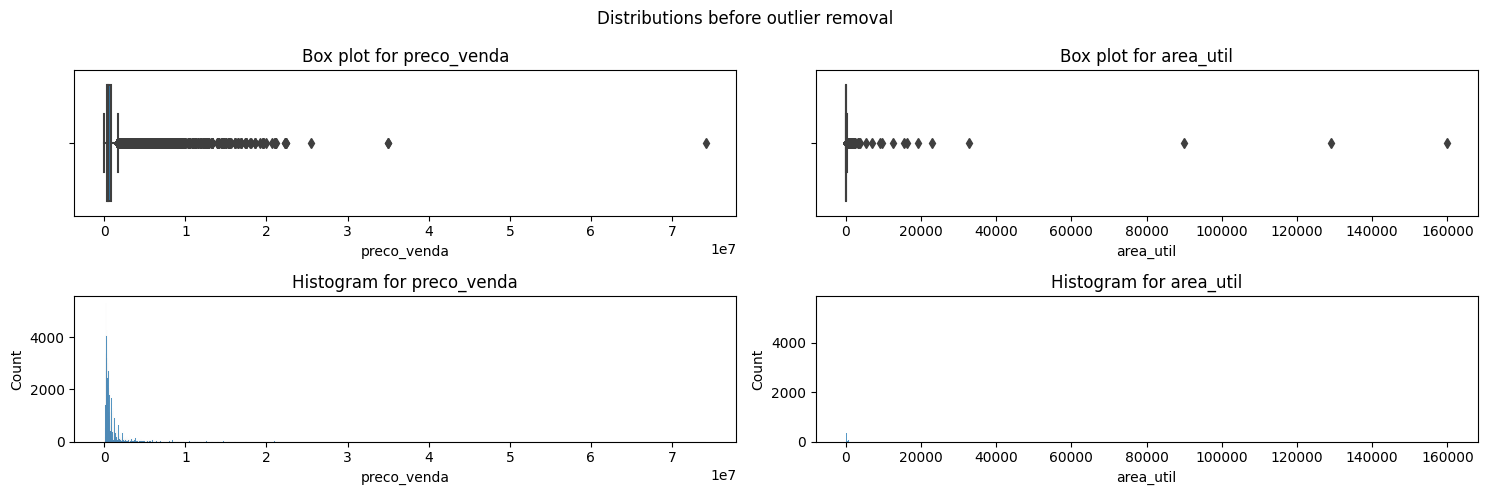

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.boxplot(x="preco_venda", data=sp_house_prices, ax=ax1)
ax1.set_title("Box plot for preco_venda");
sns.histplot(x="preco_venda", data=sp_house_prices, ax=ax3)
ax3.set_title("Histogram for preco_venda");

sns.boxplot(x="area_util", data=sp_house_prices, ax=ax2)
ax2.set_title("Box plot for area_util");
sns.histplot(x="area_util", data=sp_house_prices, ax=ax4)
ax4.set_title("Histogram for area_util");

fig.suptitle("Distributions before outlier removal")

plt.tight_layout()

We can clearly see that some points of those features are far distant from the features distribution mean, distorting their histograms to the point of turning them difficult to analyse. I strongly believe that some of this data was generated by data extraction errors. So the most logical approach is to exclude those rows.

For this I'll use an approach very similar to what the [Box plot](https://en.wikipedia.org/wiki/Box_plot) uses to [identify outliers](https://en.wikipedia.org/wiki/Box_plot#:~:text=Another%20popular%20choice,star%2C%20etc..). The steps are:

1. Compute the first distribution **quartile** ($Q_1$), a.k.a. **25th percentile**, which is median of the lower half of the dataset.
2. Compute the third distribution **quartile** ($Q_3$), a.k.a. **75th percentile**, which is median of the upper half of the dataset.
2. Compute the **interquartile range** ($IQR$), by:
$$
IQR = Q_3 - Q_1
$$
3. Compute the lower bound ($L$) and upper bound ($U$) of the data, by using:
$$
U = Q_3 + 2.0 IQR
$$
4. Any data $x$ which $ x > U $ will be considered as an outlier.

In [16]:
def detect_outlier(df: pd.DataFrame, col: str) -> pd.DataFrame:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1

    return df[col].apply(lambda v: v > (q3 + 2.0 * iqr))


sp_house_prices = sp_house_prices[
    ~(
        detect_outlier(sp_house_prices, "preco_venda")
        | detect_outlier(sp_house_prices, "area_util")
    )
]
sp_house_prices


,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,preco_venda,taxa_condominio,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,700000,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,336000,NaN,NaN
2,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,739643,686.0,1610.0
4,Pinheiros,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,630700,1120.0,489.0
5,Vila Santa Clara,Condominio,110.0,1.0,1.0,3.0,2.0,2018-04-16,385000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105310,Vila Carmosina,Apartamento,48.0,1.0,0.0,2.0,1.0,2017-10-07,171150,244.0,0.0
105312,Bela Vista,Apartamento,60.0,1.0,NaN,1.0,1.0,2017-12-13,251999,273.0,86.0
105313,Liberdade,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,249782,210.0,0.0
105315,Vila Lageado,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,623000,NaN,NaN


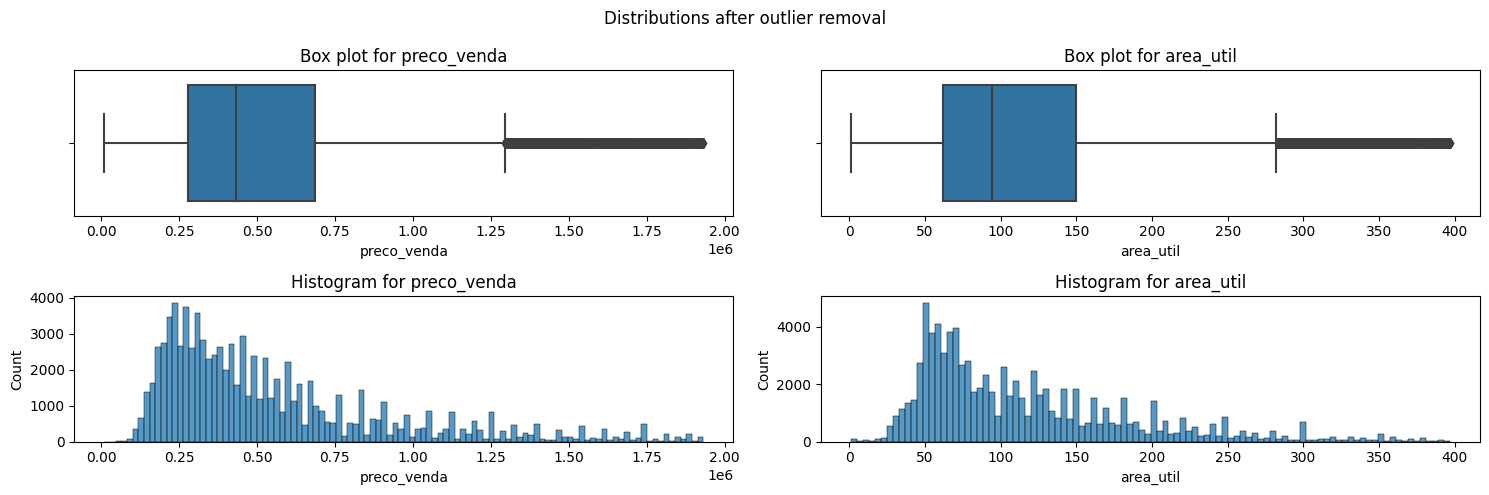

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.boxplot(x="preco_venda", data=sp_house_prices, ax=ax1)
ax1.set_title("Box plot for preco_venda");
sns.histplot(x="preco_venda", data=sp_house_prices, ax=ax3)
ax3.set_title("Histogram for preco_venda");

sns.boxplot(x="area_util", data=sp_house_prices, ax=ax2)
ax2.set_title("Box plot for area_util");
sns.histplot(x="area_util", data=sp_house_prices, ax=ax4)
ax4.set_title("Histogram for area_util");

fig.suptitle("Distributions after outlier removal")

plt.tight_layout()

### Checkpoint the processed data

At this point, we would like to checkpoint the current data. So we just need to load the data from this point to continue with our analysis.

In [18]:
sp_house_prices

,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,preco_venda,taxa_condominio,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,700000,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,336000,NaN,NaN
2,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,739643,686.0,1610.0
4,Pinheiros,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,630700,1120.0,489.0
5,Vila Santa Clara,Condominio,110.0,1.0,1.0,3.0,2.0,2018-04-16,385000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105310,Vila Carmosina,Apartamento,48.0,1.0,0.0,2.0,1.0,2017-10-07,171150,244.0,0.0
105312,Bela Vista,Apartamento,60.0,1.0,NaN,1.0,1.0,2017-12-13,251999,273.0,86.0
105313,Liberdade,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,249782,210.0,0.0
105315,Vila Lageado,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,623000,NaN,NaN


In [19]:
processed_dataset_root = os.path.join(
    os.path.dirname(os.path.abspath("")), "data", "processed"
)

if not os.path.isdir(processed_dataset_root):
    print("Creating the processed data folder!")
    os.makedirs(processed_dataset_root)

sales_filepath = os.path.join(processed_dataset_root, "sp_sales_data.parquet")

print("Creating the initial processed file.")

sp_house_prices.to_parquet(sales_filepath)


Creating the initial processed file.
